<a href="https://colab.research.google.com/github/Yaman-Shadid/Prediction-of-Product-Sales/blob/main/Car_Sales_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Car Sales**

[Car Insurance Data](https://www.kaggle.com/datasets/sagnik1511/car-insurance-data)

## Imports

In [1]:
# Import required packages
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data

In [3]:
# Save the filepath and load the data as df
fpath = "/content/drive/MyDrive/Colab Notebooks/PROJECT 2 [--]/Car_Insurance_Claim.csv"
df = pd.read_csv(fpath)
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


## EDA

In [4]:
# Check Data types
df.dtypes

ID                       int64
AGE                     object
GENDER                  object
RACE                    object
DRIVING_EXPERIENCE      object
EDUCATION               object
INCOME                  object
CREDIT_SCORE           float64
VEHICLE_OWNERSHIP      float64
VEHICLE_YEAR            object
MARRIED                float64
CHILDREN               float64
POSTAL_CODE              int64
ANNUAL_MILEAGE         float64
VEHICLE_TYPE            object
SPEEDING_VIOLATIONS      int64
DUIS                     int64
PAST_ACCIDENTS           int64
OUTCOME                float64
dtype: object

**Duplicates**

In [5]:
# Checking for duplicates
duplicates = df.duplicated()

In [6]:
# Counting the number of duplicates
num_duplicates = duplicates.sum()
print("Number of duplicates:", num_duplicates)

Number of duplicates: 0


### Missing Values
Checking for missing values:

In [7]:
# Checking for missing values
missing_values = df.isnull().sum()

In [8]:
# Displaying the count of missing values for each column
print(missing_values)

ID                       0
AGE                      0
GENDER                   0
RACE                     0
DRIVING_EXPERIENCE       0
EDUCATION                0
INCOME                   0
CREDIT_SCORE           982
VEHICLE_OWNERSHIP        0
VEHICLE_YEAR             0
MARRIED                  0
CHILDREN                 0
POSTAL_CODE              0
ANNUAL_MILEAGE         957
VEHICLE_TYPE             0
SPEEDING_VIOLATIONS      0
DUIS                     0
PAST_ACCIDENTS           0
OUTCOME                  0
dtype: int64


In [9]:
# Filling missing values with a placeholder
df_filled = df.fillna('-1')

In [10]:
# Checking for missing values after filling
missing_values_after_fill = df_filled.isnull().sum()

# Displaying the count of missing values for each column
print(missing_values_after_fill)

ID                     0
AGE                    0
GENDER                 0
RACE                   0
DRIVING_EXPERIENCE     0
EDUCATION              0
INCOME                 0
CREDIT_SCORE           0
VEHICLE_OWNERSHIP      0
VEHICLE_YEAR           0
MARRIED                0
CHILDREN               0
POSTAL_CODE            0
ANNUAL_MILEAGE         0
VEHICLE_TYPE           0
SPEEDING_VIOLATIONS    0
DUIS                   0
PAST_ACCIDENTS         0
OUTCOME                0
dtype: int64


Categorical Columuns

In [11]:
# Identify columns with categorical data
categorical_columns = ['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
                       'VEHICLE_YEAR', 'VEHICLE_TYPE',]

In [12]:
# Check unique values in categorical columns
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}:")
    print(unique_values)
    print()

Unique values in AGE:
['65+' '16-25' '26-39' '40-64']

Unique values in GENDER:
['female' 'male']

Unique values in RACE:
['majority' 'minority']

Unique values in DRIVING_EXPERIENCE:
['0-9y' '10-19y' '20-29y' '30y+']

Unique values in EDUCATION:
['high school' 'none' 'university']

Unique values in INCOME:
['upper class' 'poverty' 'working class' 'middle class']

Unique values in VEHICLE_YEAR:
['after 2015' 'before 2015']

Unique values in VEHICLE_TYPE:
['sedan' 'sports car']



In [13]:
# Selecting numerical columns
numerical_columns = ['CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
                     'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']

# Calculate and display summary statistics
for column in numerical_columns:
    column_data = df[column]
    column_min = column_data.min()
    column_max = column_data.max()
    column_mean = column_data.mean()
    print(f"Summary statistics for {column}:")
    print(f"Minimum: {column_min}")
    print(f"Maximum: {column_max}")
    print(f"Mean: {column_mean}")
    print()

Summary statistics for CREDIT_SCORE:
Minimum: 0.0533575454627435
Maximum: 0.9608188278116948
Mean: 0.515812809602791

Summary statistics for VEHICLE_OWNERSHIP:
Minimum: 0.0
Maximum: 1.0
Mean: 0.697

Summary statistics for MARRIED:
Minimum: 0.0
Maximum: 1.0
Mean: 0.4982

Summary statistics for CHILDREN:
Minimum: 0.0
Maximum: 1.0
Mean: 0.6888

Summary statistics for ANNUAL_MILEAGE:
Minimum: 2000.0
Maximum: 22000.0
Mean: 11697.003206900365

Summary statistics for SPEEDING_VIOLATIONS:
Minimum: 0
Maximum: 22
Mean: 1.4829

Summary statistics for DUIS:
Minimum: 0
Maximum: 6
Mean: 0.2392

Summary statistics for PAST_ACCIDENTS:
Minimum: 0
Maximum: 15
Mean: 1.0563

Summary statistics for OUTCOME:
Minimum: 0.0
Maximum: 1.0
Mean: 0.3133



## Visuals

In [14]:
# Checking num cols
num_cols = df.select_dtypes('number').columns
num_cols

Index(['ID', 'CREDIT_SCORE', 'VEHICLE_OWNERSHIP', 'MARRIED', 'CHILDREN',
       'POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS',
       'PAST_ACCIDENTS', 'OUTCOME'],
      dtype='object')

In [15]:
# Get correlations
corr = df.corr(numeric_only = True)
corr.round(2)

,ID,CREDIT_SCORE,VEHICLE_OWNERSHIP,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
ID,1.00,0.00,0.01,0.01,0.00,0.01,-0.00,0.01,0.01,0.00,-0.01
CREDIT_SCORE,0.00,1.00,0.31,0.28,0.22,0.01,-0.17,0.20,0.13,0.18,-0.33
VEHICLE_OWNERSHIP,0.01,0.31,1.00,0.18,0.13,-0.00,-0.10,0.13,0.09,0.12,-0.38
MARRIED,0.01,0.28,0.18,1.00,0.29,0.01,-0.46,0.22,0.12,0.22,-0.26
CHILDREN,0.00,0.22,0.13,0.29,1.00,0.02,-0.45,0.22,0.12,0.21,-0.23
POSTAL_CODE,0.01,0.01,-0.00,0.01,0.02,1.00,-0.13,0.11,0.04,-0.12,0.10
ANNUAL_MILEAGE,-0.00,-0.17,-0.10,-0.46,-0.45,-0.13,1.00,-0.32,-0.12,-0.20,0.19
SPEEDING_VIOLATIONS,0.01,0.20,0.13,0.22,0.22,0.11,-0.32,1.00,0.36,0.44,-0.29
DUIS,0.01,0.13,0.09,0.12,0.12,0.04,-0.12,0.36,1.00,0.26,-0.19
PAST_ACCIDENTS,0.00,0.18,0.12,0.22,0.21,-0.12,-0.20,0.44,0.26,1.00,-0.31


Text(0.5, 1.0, 'DUIS Histogram')

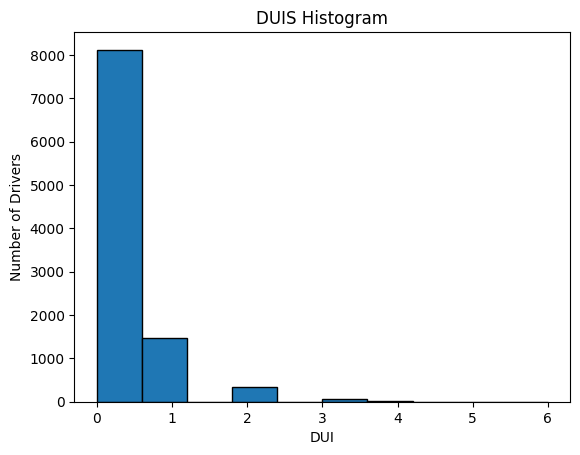

In [16]:
# Create a histogram of the 'DUIS' column
plt.hist(df['DUIS'], bins=10, edgecolor='black')

# Set labels and title
plt.xlabel('DUI')
plt.ylabel('Number of Drivers')
plt.title('DUIS Histogram')

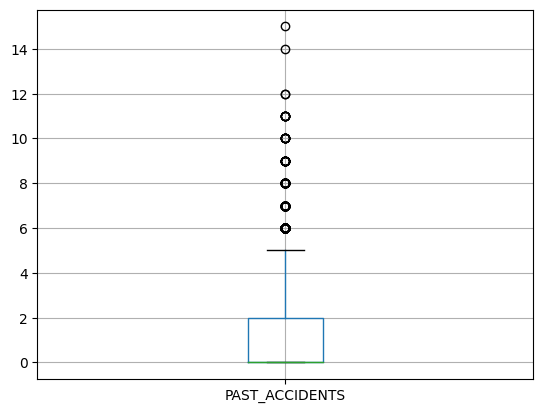

In [17]:
# Boxplot
ax = df.boxplot(column='PAST_ACCIDENTS')
plt.show()

In [18]:
# Using select dtypes to get names of categorical columns
cat_cols = df.select_dtypes('object').columns
cat_cols

Index(['AGE', 'GENDER', 'RACE', 'DRIVING_EXPERIENCE', 'EDUCATION', 'INCOME',
       'VEHICLE_YEAR', 'VEHICLE_TYPE'],
      dtype='object')

In [19]:
# Saving the value counts
val_counts_INCOME = df['INCOME'].value_counts()
val_counts_INCOME

upper class      4336
middle class     2138
poverty          1814
working class    1712
Name: INCOME, dtype: int64

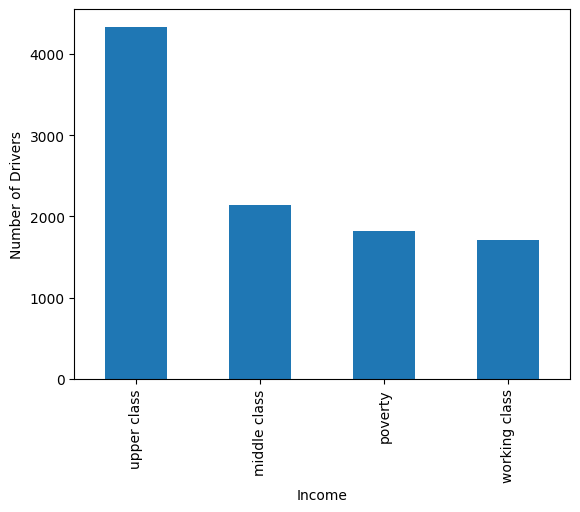

In [20]:
# Plot value counts as a bar graph
ax = val_counts_INCOME.plot(kind='bar')
ax.set_ylabel("Number of Drivers");
ax.set_xlabel("Income");

<ipython-input-21-33b7f55936dc>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


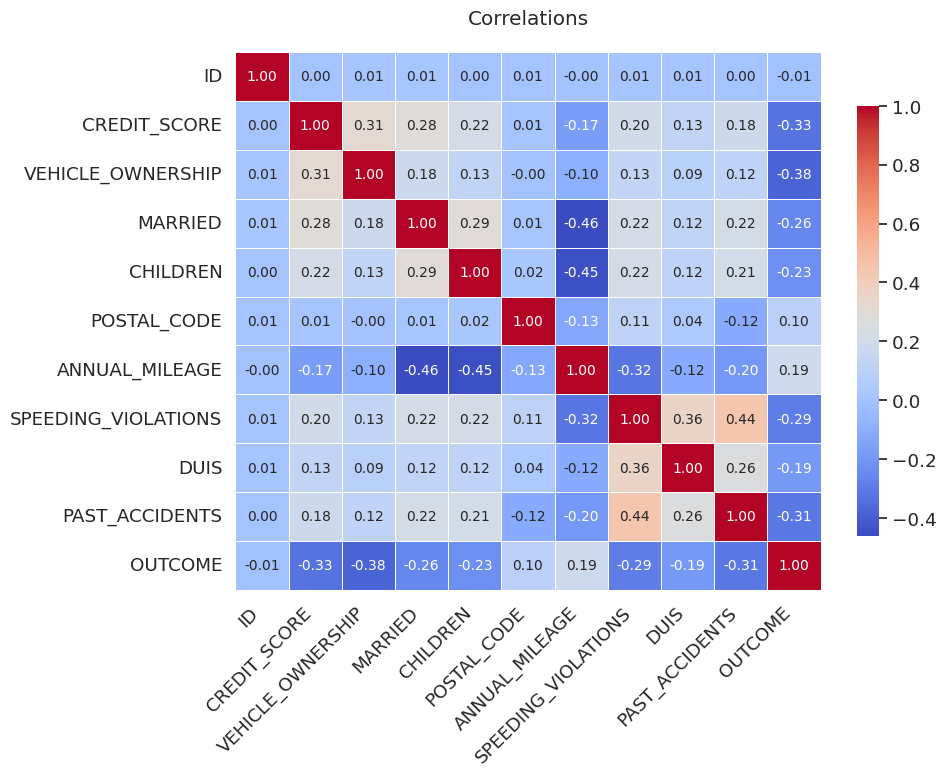

In [21]:
# Compute the correlation matrix
corr = df.corr()

# Set up the figure and axes
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.2)
sns.set_style("whitegrid")

# Create the correlation heatmap with annotations and rotated xticklabels
heatmap = sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5,
                      xticklabels=corr.columns, yticklabels=corr.columns,
                      annot_kws={"size": 10}, cbar_kws={"shrink": 0.8})

# Rotate the xticklabels
plt.xticks(rotation=45, ha='right')

# Set the title and adjust layout
plt.title('Correlations', pad=20)
plt.tight_layout()

# Display the plot
plt.show()

<ipython-input-22-f0a5f086c69c>:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(data=df, x="PAST_ACCIDENTS", y="DUIS", ci="sd", palette="Set2")


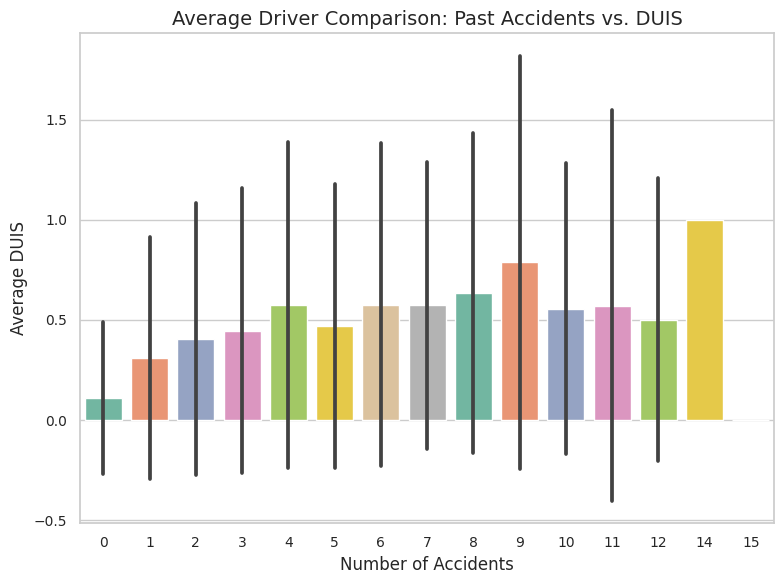

In [22]:
# Set up the figure and style
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Create the bar plot
sns.barplot(data=df, x="PAST_ACCIDENTS", y="DUIS", ci="sd", palette="Set2")

# Set labels and title with adjusted font size
plt.xlabel("Number of Accidents", fontsize=12)
plt.ylabel("Average DUIS", fontsize=12)
plt.title("Average Driver Comparison: Past Accidents vs. DUIS", fontsize=14)

# Adjust tick label font size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()

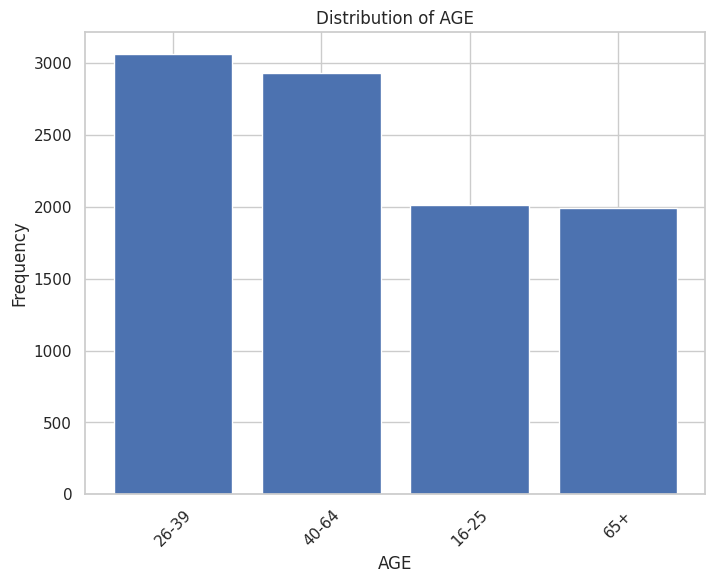

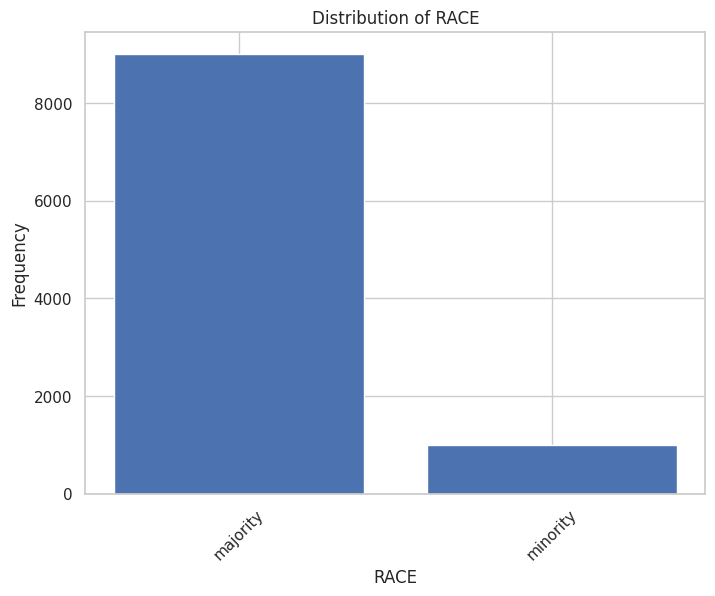

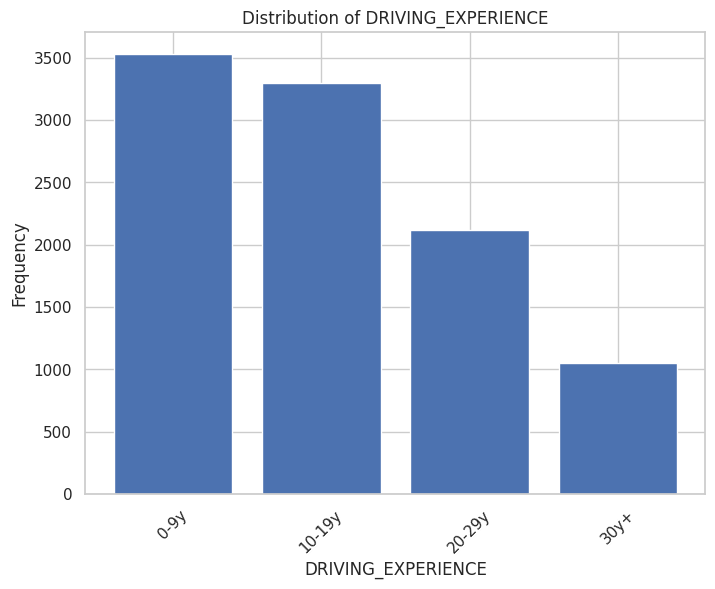

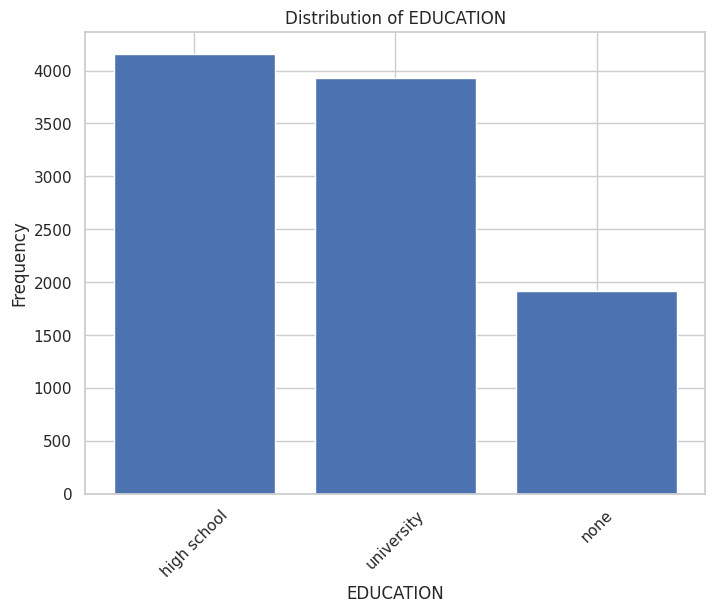

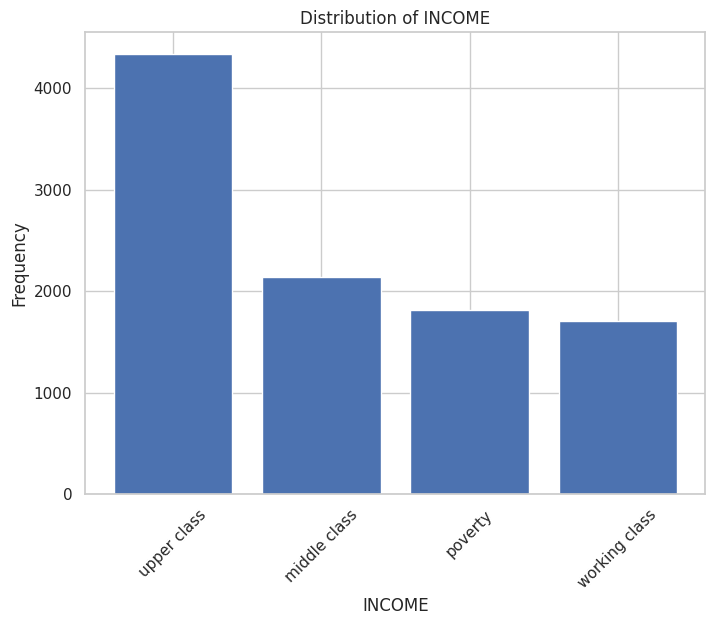

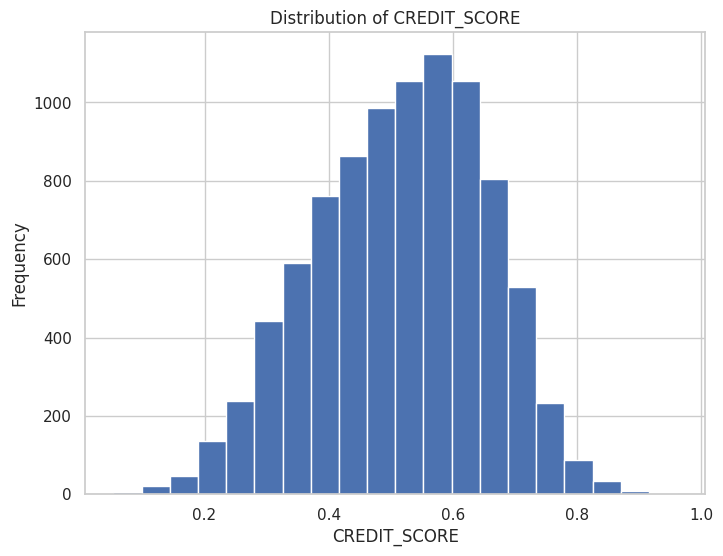

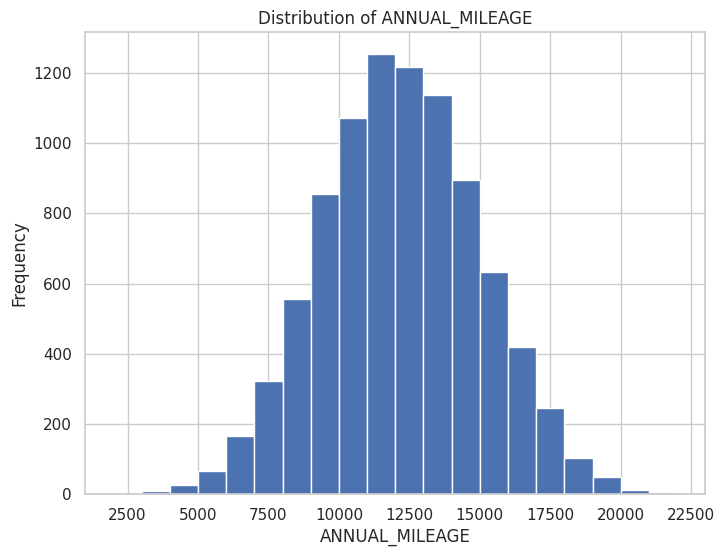

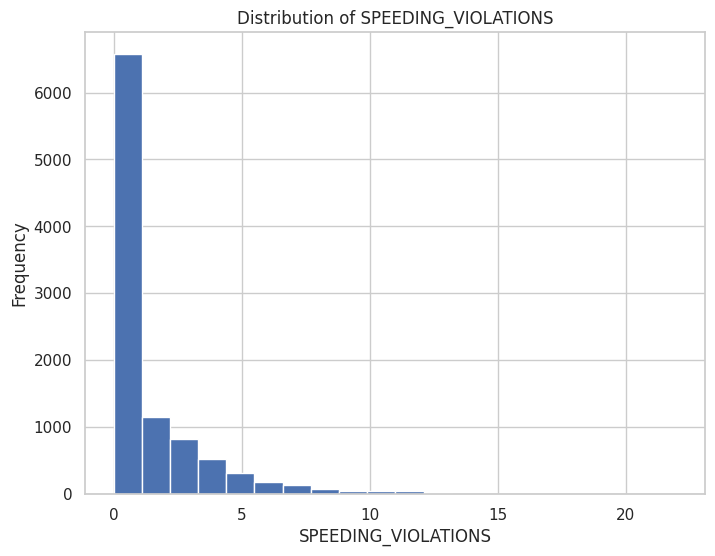

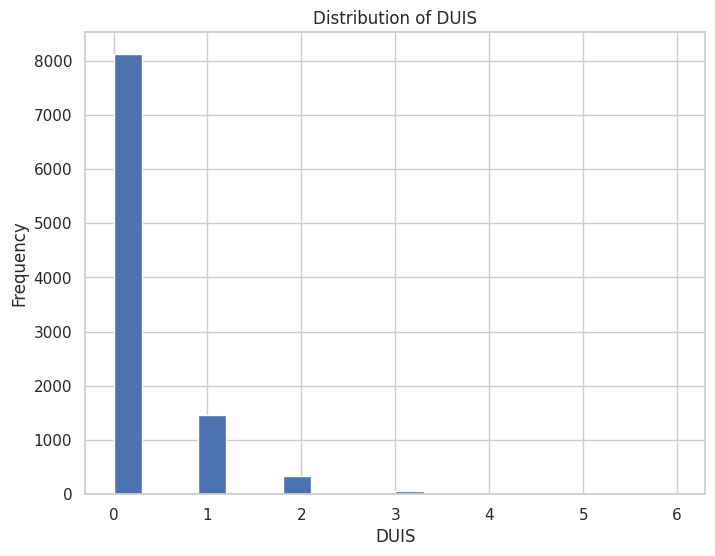

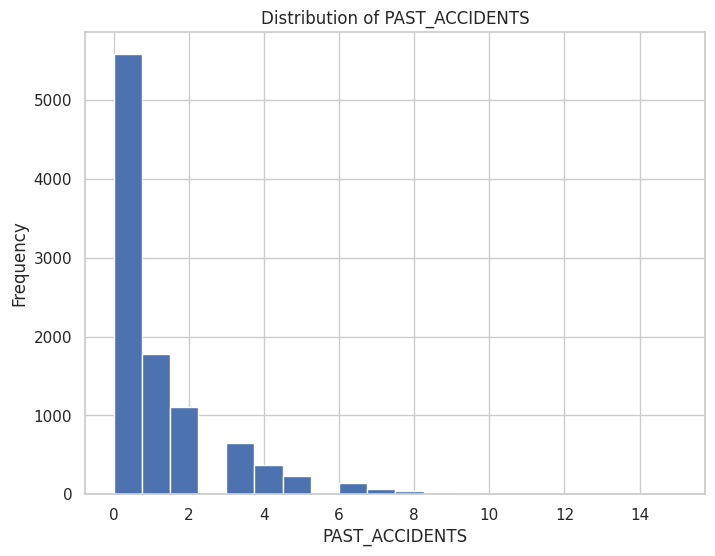

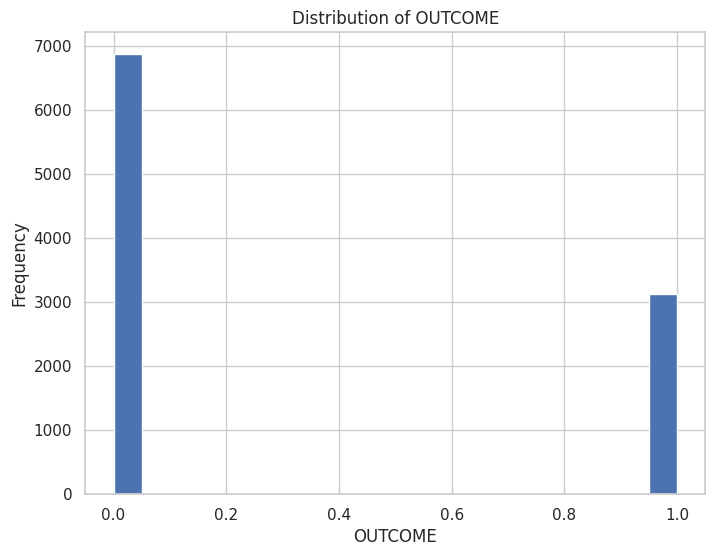

In [23]:
# Function to create bar charts for categorical variables
def plot_categorical(feature):
    value_counts = df[feature].value_counts()
    plt.figure(figsize=(8, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.xticks(rotation=45)
    plt.show()

# Function to create histograms for numeric variables
def plot_numeric(feature):
    plt.figure(figsize=(8, 6))
    plt.hist(df[feature], bins=20)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Distribution of {feature}')
    plt.show()

# Univariate visualizations for the specified features
plot_categorical('AGE')
plot_categorical('RACE')
plot_categorical('DRIVING_EXPERIENCE')
plot_categorical('EDUCATION')
plot_categorical('INCOME')

plot_numeric('CREDIT_SCORE')
plot_numeric('ANNUAL_MILEAGE')
plot_numeric('SPEEDING_VIOLATIONS')
plot_numeric('DUIS')
plot_numeric('PAST_ACCIDENTS')
plot_numeric('OUTCOME')

Categorical

In [24]:
def explore_categorical(df, x, fillna=True, placeholder = 'MISSING'):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=(6,4))
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")
  fig.tight_layout()

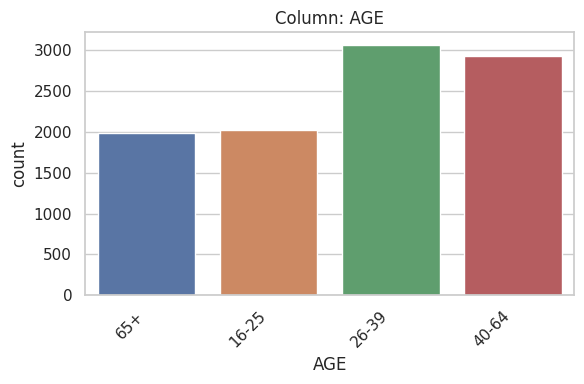

In [25]:
# Test our function on
explore_categorical(df, 'AGE');

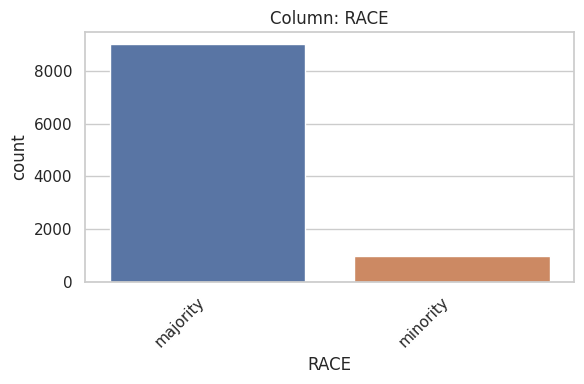

In [26]:
# Test our function on
explore_categorical(df, 'RACE');

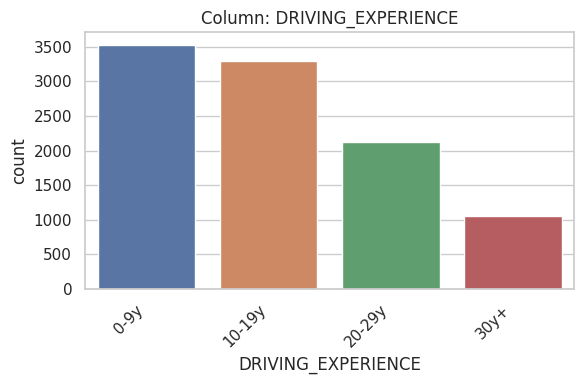

In [27]:
# Test our function on
explore_categorical(df, 'DRIVING_EXPERIENCE');

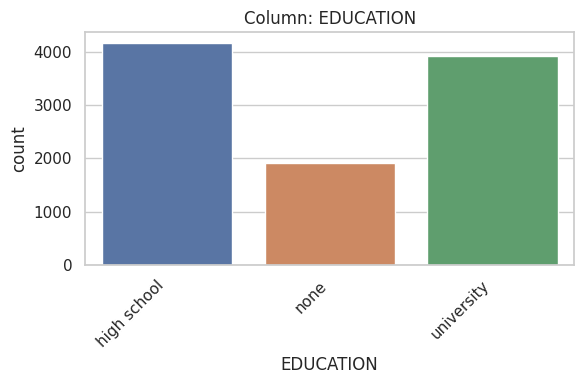

In [28]:
# Test our function on
explore_categorical(df, 'EDUCATION');

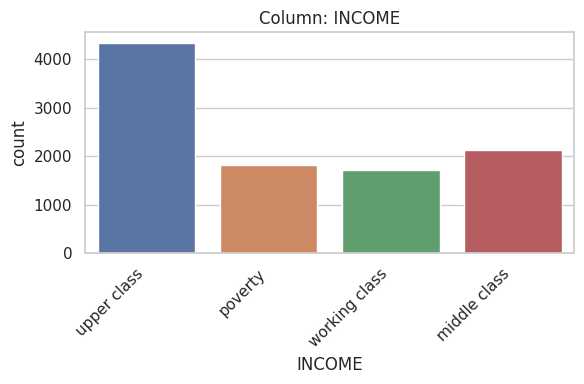

In [29]:
# Test our function on
explore_categorical(df, 'INCOME');

Numerical

In [30]:
def plot_numeric_vs_target(df, x, y='Item_MRP', figsize=(6,4)):
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws)
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

In [31]:
# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='SPEEDING_VIOLATIONS', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax

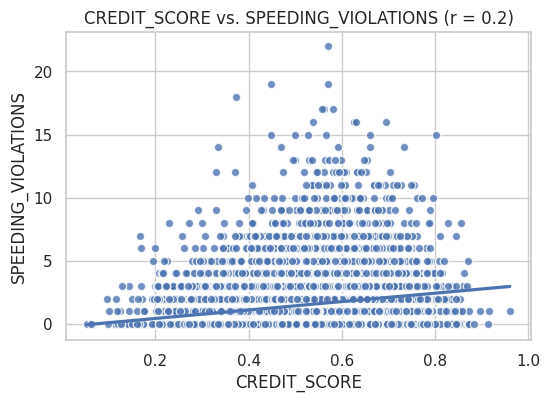

In [32]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "CREDIT_SCORE",)

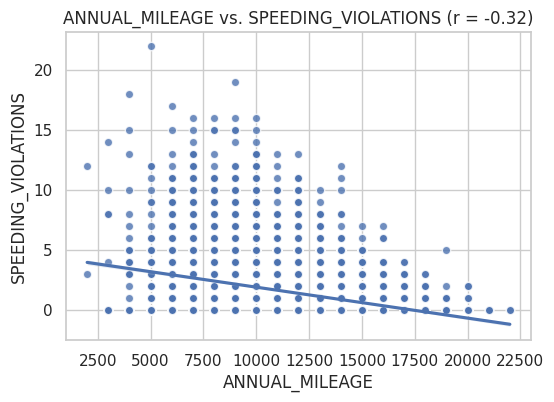

In [33]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "ANNUAL_MILEAGE",)

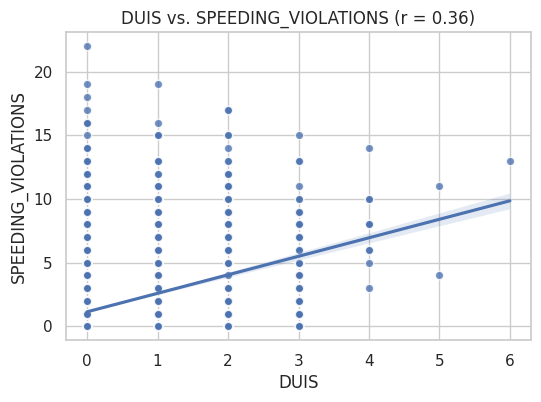

In [34]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "DUIS",)

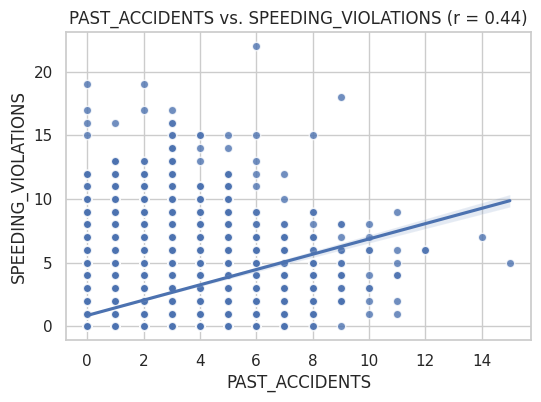

In [35]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "PAST_ACCIDENTS",)

## Analysis

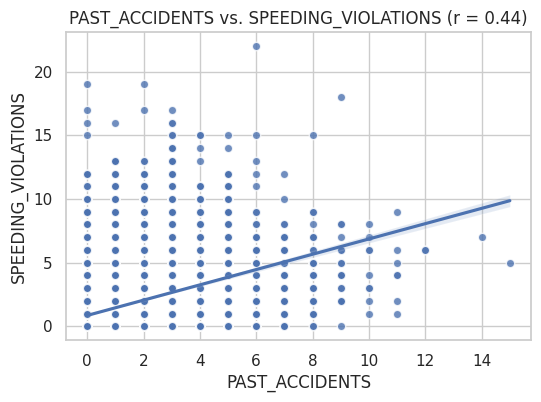

In [36]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "PAST_ACCIDENTS",)

This plot displays the relationship between the Past Accidents of drivers and their current number of Speeding Violations.

The data shows that the Speeding Violations are higher the lower the Past Accidents. May suggest that drivers are more careful overtime because of their frequent violations, so it lessens their accidents.

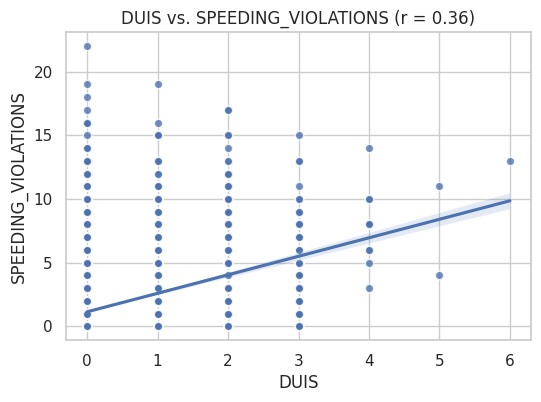

In [37]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "DUIS",)

This plot displays the relationship between the DUIS of drivers and their current number of Speeding Violations.

The data shows that the Speeding Violations are higher the lower the DUIS. May suggest that drivers are also more careful overtime because of their frequent violations, so it lessens their accidents.

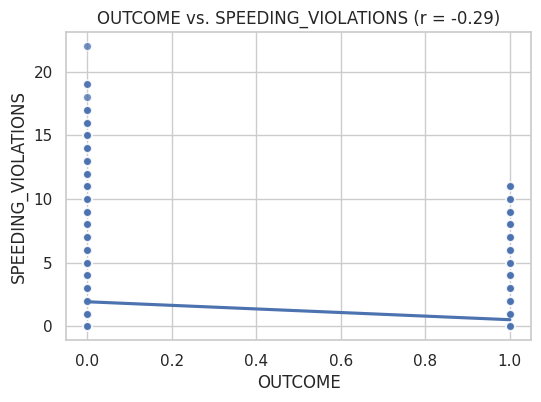

In [39]:
# Test the function with two kwargs from the regplot function
fig, ax = plot_numeric_vs_target(df, "OUTCOME",)

This plot displays the relationship between the OUTCOME of drivers and their current number of Speeding Violations.

The data shows that Speeding Violations are higher for OUTCOME '0'. May suggest that drivers unlikely to claim their loans overtime because of their violations.

Aditional Heatmap FOR TESTING

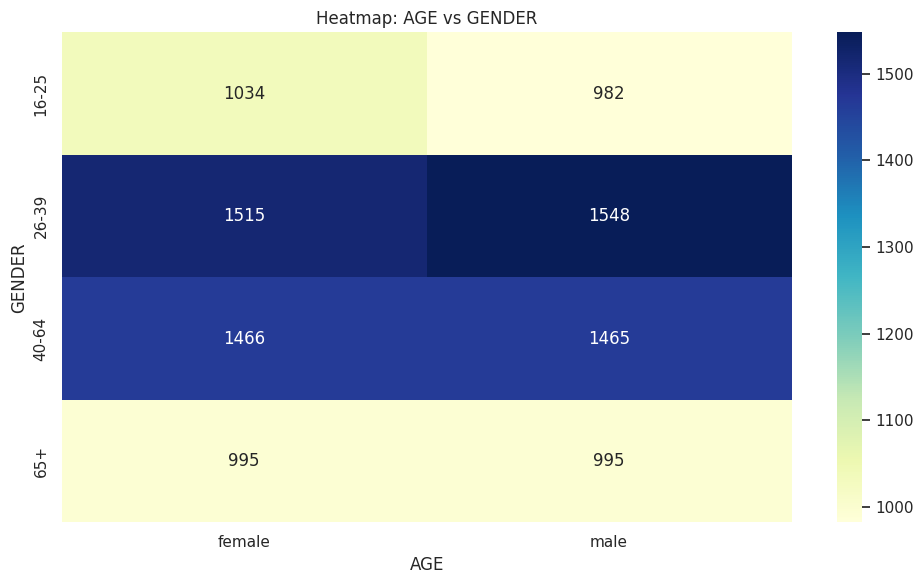

In [47]:
def explore_categorical_heatmap(df, x, y, fillna=True, placeholder='MISSING'):
    # Make a copy of the dataframe and fillna
    temp_df = df.copy()

    # fillna with placeholder for both x and y columns
    if fillna:
        temp_df[x] = temp_df[x].fillna(placeholder)
        temp_df[y] = temp_df[y].fillna(placeholder)

    # Create a pivot table to calculate counts for heatmap
    pivot_table = temp_df.groupby([x, y]).size().unstack(fill_value=0)

    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting a heatmap
    sns.heatmap(data=pivot_table, annot=True, fmt='d', cmap='YlGnBu', ax=ax)

    # Add labels and title
    ax.set_xlabel(x)
    ax.set_ylabel(y)
    ax.set_title(f"Heatmap: {x} vs {y}")

    fig.tight_layout()
explore_categorical_heatmap(df, 'AGE', 'GENDER')
plt.show()

Heatmap for all numerical features:

<ipython-input-46-1057eead59df>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = temp_df[numerical_columns].corr()


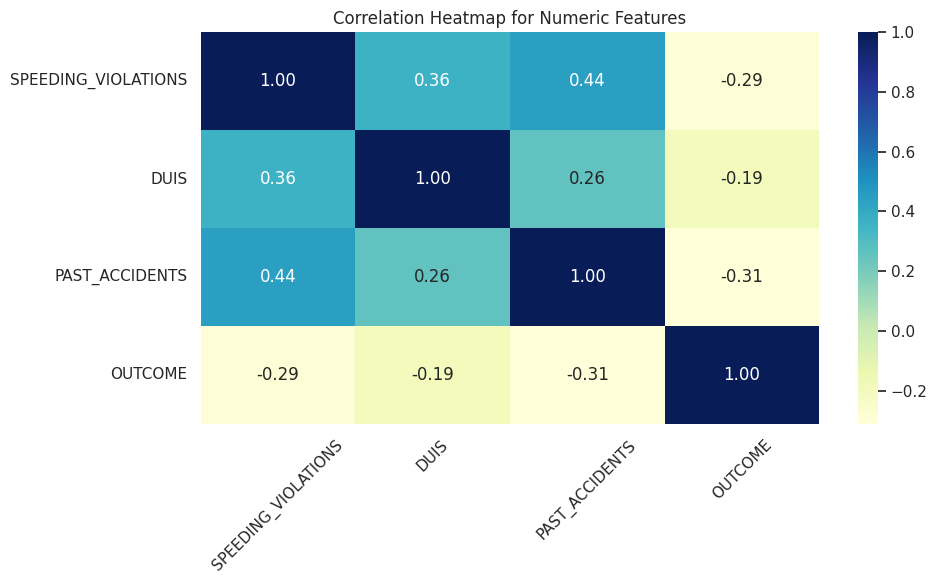

In [46]:
def explore_numeric_heatmap(df, numerical_columns, fillna=True, placeholder='MISSING'):
    # Make a copy of the dataframe and fillna
    temp_df = df.copy()

    if fillna:
        # Fill missing values with the specified placeholder for all numerical columns
        temp_df[numerical_columns] = temp_df[numerical_columns].fillna(placeholder)

    # Create a pivot table to calculate correlations for heatmap
    correlation_matrix = temp_df[numerical_columns].corr()

    # Create figure with desired figsize
    fig, ax = plt.subplots(figsize=(10, 6))

    # Plotting a heatmap
    sns.heatmap(data=correlation_matrix, annot=True, fmt='.2f', cmap='YlGnBu', ax=ax)

    # Add labels and title
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0)
    ax.set_title("Correlation Heatmap for Numeric Features")

    fig.tight_layout()

# Example usage
numeric_columns = ['CREDIT_SCORE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS', 'OUTCOME']
explore_numeric_heatmap(df, numeric_columns)
plt.show()

## ML Portion / Modeling
Done in different [google colab](https://colab.research.google.com/drive/1XmHpVWr71ShUtlHbR-YXcrmLbA5rwDg3?usp=sharing)